In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

In [2]:
# load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, delimiter=";")

In [10]:
#converting the csv file to pandas dataframe
df = pd.DataFrame(data)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Text(0.5, 1.0, 'Box-Cox Transformed\xa0Distribution')

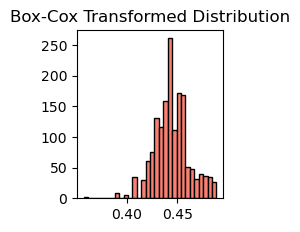

In [26]:
# Box-Cox Transformation (requires positive values)
positive_values = values + 1  # Ensure all values are positive
boxcox_transformed, _ = boxcox(positive_values)
plt.subplot(2, 3, 3)
plt.hist(boxcox_transformed, bins=30, color="salmon", edgecolor="black")
plt.title("Box-Cox Transformed Distribution")

In [17]:
# choose a column that is not normally distributed
column = "residual sugar"
values = data[column]

In [19]:
column

'residual sugar'

(array([ 15., 332., 647., 339.,  84.,  40.,  37.,  17.,  13.,  16.,  18.,
         11.,   2.,   2.,   7.,   4.,   4.,   0.,   0.,   0.,   3.,   0.,
          0.,   0.,   1.,   1.,   3.,   0.,   0.,   3.]),
 array([ 0.9       ,  1.38666667,  1.87333333,  2.36      ,  2.84666667,
         3.33333333,  3.82      ,  4.30666667,  4.79333333,  5.28      ,
         5.76666667,  6.25333333,  6.74      ,  7.22666667,  7.71333333,
         8.2       ,  8.68666667,  9.17333333,  9.66      , 10.14666667,
        10.63333333, 11.12      , 11.60666667, 12.09333333, 12.58      ,
        13.06666667, 13.55333333, 14.04      , 14.52666667, 15.01333333,
        15.5       ]),
 <BarContainer object of 30 artists>)

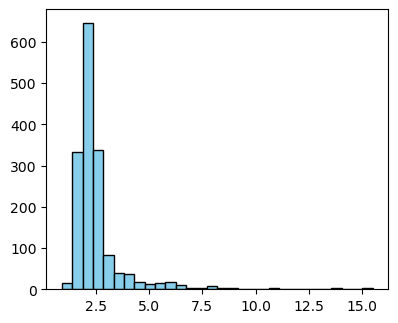

In [22]:
# plot original distribution 
plt.figure(figsize=(15, 8))
plt.subplot(2,3,1)
plt.hist(values, bins=30, color="skyblue",edgecolor="black")

Text(0.5, 1.0, 'log-trasformed distribution')

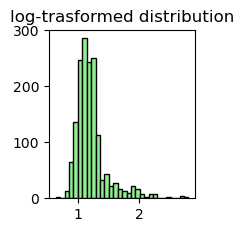

In [38]:
# log transformation
log_transformed = np.log1p(values)
plt.subplot(2,3,2)
plt.hist(log_transformed, bins=30, color="lightgreen", edgecolor="black")
plt.title("log-trasformed distribution")

Text(0.5, 1.0, 'Box-Cox Transformed\xa0Distribution')

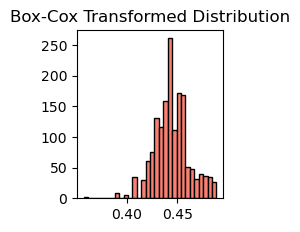

In [39]:
# Box-Cox Transformation (requires positive values)
positive_values = values + 1  # Ensure all values are positive
boxcox_transformed, _ = boxcox(positive_values)
plt.subplot(2, 3, 3)
plt.hist(boxcox_transformed, bins=30, color="salmon", edgecolor="black")
plt.title("Box-Cox Transformed Distribution")

Text(0.5, 1.0, 'square root transformed distribution')

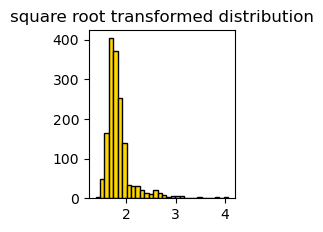

In [45]:
# square root transformation
sqrt_transformed = np.sqrt(values + 1) # Ensure no negatives
plt.subplot(2, 3, 4)
plt.hist(sqrt_transformed, bins=30, color="gold", edgecolor="black")
plt.title("square root transformed distribution")

Text(0.5, 1.0, 'Reciprocal Transformed Distribution')

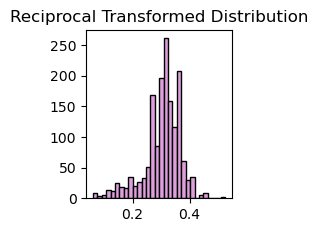

In [49]:
# reciprocal Transformation
# Adding a small constant to avoid division by zero
reciprocal_transformed = 1 / (values + 1)
plt.subplot(2, 3, 5)
plt.hist(reciprocal_transformed, bins=30, color="plum", edgecolor="black")
plt.title("Reciprocal Transformed Distribution")